In [1]:
# @author Jungjae Lee
# Independent Study
# Created on June 18, 2022
# Last Updated on June 23, 2022
# Sources: Stock Price Prediction Using Python & Machine Learning by Computer Science on the Youtube channel

In [2]:
# This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the
# closing stock price of a corporation (Apple Inc.) using the past 60-day stock price.

# LSTM: Used in deep learning and has feedback connections.
# It can process single data points such as images and entire sequences of data such as speech or video.
# It is exceptionally effective because LSTM stores past information that is important and forgets the information
# that is not important.

In [3]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') # df is short for dataframe

# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557466
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624947
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765113
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898559
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878099
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.519096
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.688614
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.595123


In [5]:
# The number of rows and columns in the data set
df.shape

(2003, 6)

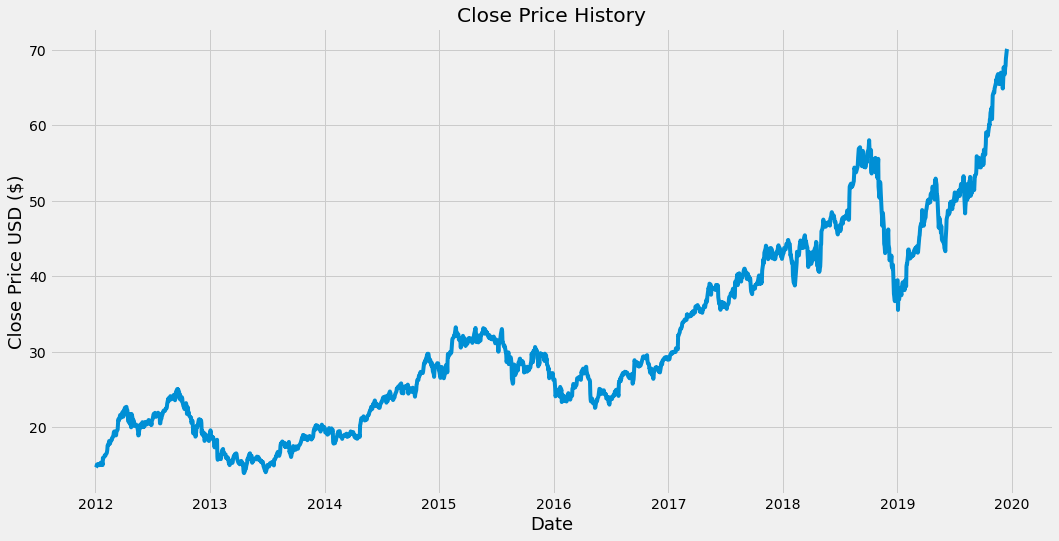

In [6]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])

# Convert the dataframe to a numpy array. Numpy array creates array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8) # math.ceil is not neccessary, but it rounds up the number
training_data_len

1603

In [8]:
# Scale the data: It is always advantageous to apply pre-processing transformation scaling or normalization
# to the input data before it is presented to a neural network.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [9]:
# Training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]


# Split the data into x_train and y_train data sets
x_train = [] # Independent training valuables/training features
y_train = [] # Depdendent valuables/target valuables

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # Contains 60 values: 0 to 60
    y_train.append(train_data[i, 0]) # Contrains 61st value
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [10]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data: LSTM network expect the input to be 3-dimensional in the form of smaples, number of time steps,
# and number of features

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-06-23 22:40:12.957073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 52s 32ms/step - loss: 7.5704e-04


In [15]:
# Create the testing data set
# Create a new array containg scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [17]:
# Reshape the data: This set is two dimentional, and we should have three dimentional shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # (number of rows, columns(time steps), number
                                                                    # of feature steps

In [18]:
# Get the models predicted price values
# We want predictions data to containt the same value as the y_test set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 18ms/step


In [19]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

2.751720485687256

In [20]:
# <- This is really AMAZING! 2.75 means the prediction is REALLY close to an actual values!

/var/folders/yg/4480_kf93yggdqqlks7l0lkw0000gn/T/ipykernel_5379/2337451128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


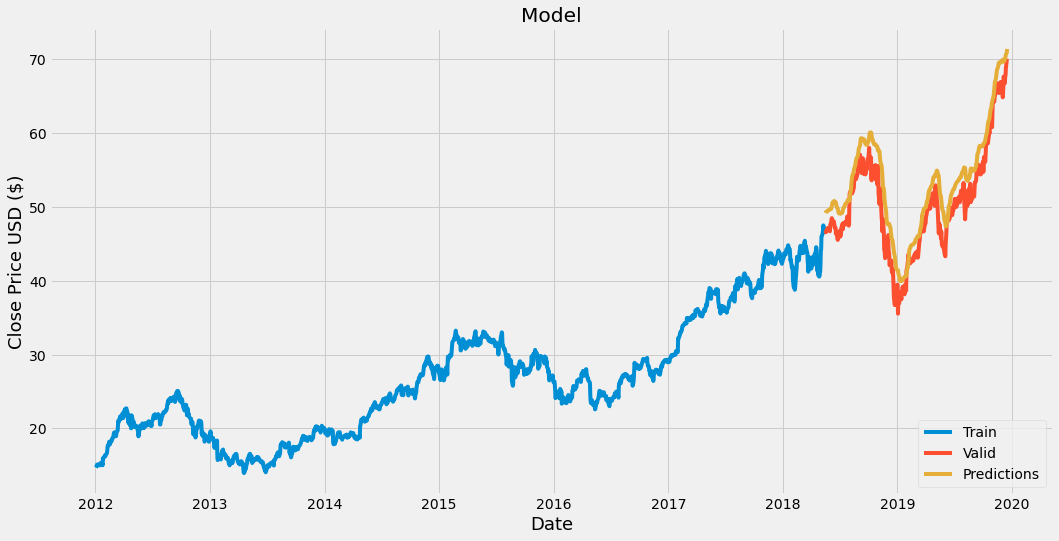

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,49.204151
2018-05-18,46.577499,49.311356
2018-05-21,46.907501,49.354015
2018-05-22,46.790001,49.402145
2018-05-23,47.090000,49.435272
...,...,...
2019-12-11,67.692497,70.187874
2019-12-12,67.864998,70.406364
2019-12-13,68.787498,70.640083


In [30]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 31ms/step
[[71.89488]]


In [31]:
# Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
